# **Sesión 07: Pruebas A/B y Procesamiento de Lenguaje Natural**

-----
-----
-----

## **Prework**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
test_a_conversion = []
test_a_no_conversion = []

for _ in range(23739):
    conv = 1 if np.random.rand() > 0.8425 else 0
    no_conv = 1 if conv == 0 else 0
    
    test_a_conversion.append(conv)
    test_a_no_conversion.append(no_conv)
    
df = pd.DataFrame(
    {'conversion': test_a_conversion,
    'no conversion': test_a_no_conversion}
)

df['test'] = 'A'

In [ ]:
df['test'] = 'A'

In [ ]:
df

,conversion,no conversion,test
0,0,1,A
1,0,1,A
2,0,1,A
3,0,1,A
4,1,0,A
...,...,...,...
23734,0,1,A
23735,0,1,A
23736,0,1,A
23737,0,1,A


In [ ]:
test_b_conversion = []
test_b_no_conversion = []

for _ in range(22588):
    conv = 1 if np.random.rand() > 0.8057 else 0
    no_conv = 1 if conv == 0 else 0
    
    test_b_conversion.append(conv)
    test_b_no_conversion.append(no_conv)
    
df_2 = pd.DataFrame(
    {'conversion': test_b_conversion,
    'no conversion': test_b_no_conversion}
)

df_2['test'] = 'B'

In [ ]:
df_2

,conversion,no conversion,test
0,0,1,B
1,0,1,B
2,0,1,B
3,1,0,B
4,0,1,B
...,...,...,...
22583,0,1,B
22584,0,1,B
22585,1,0,B
22586,0,1,B


In [ ]:
df_full = pd.concat([df, df_2], axis=0)

In [ ]:
df_full = df_full.sample(frac=1).reset_index(drop=True)

In [ ]:
df_full

,conversion,no conversion,test
0,0,1,A
1,1,0,B
2,0,1,A
3,0,1,B
4,0,1,A
...,...,...,...
46322,0,1,A
46323,0,1,A
46324,0,1,B
46325,0,1,A


In [ ]:
df_full.to_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto ab_test-sales_pipeline.csv', index=False)

In [ ]:
df_full = df_full[['test', 'conversion', 'no conversion']]

In [ ]:
pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto ab_test-sales_pipeline.csv')

,conversion,no conversion,test
0,0,1,A
1,1,0,B
2,0,1,A
3,0,1,B
4,0,1,A
...,...,...,...
46322,0,1,A
46323,0,1,A
46324,0,1,B
46325,0,1,A


----
----
----

## **Work**


# Sesión 07: Pruebas A/B y Procesamiento de Lenguaje Natural

## :dart: Objetivos

- Evaluar los resultados de Pruebas A/B.
- Aplicar algunas técnicas de lenguaje natural usando Nltk y TextBlob.

## 📂 Contenido

---

<ins>Pruebas A/B</ins>

Aprendimos en el Prework que una prueba A/B (A/B Test) es un experimento con dos grupos de personas para establecer cuál de dos tratamientos, procedimientos, productos, etc, es superior.

Con base en lo que leyeron en el Prework, vamos a responder las siguientes preguntas y debatir acerca de ellas:

1. ¿Qué es el grupo control y el grupo experimental? ¿Por qué es importante establecer la diferencia?
2. ¿Cómo se evitan los sesgos de selección a la hora de crear estos dos grupos? ¿Por qué queremos evitar los sesgos de selección?
3. ¿En qué momento decidimos cuál va a ser nuestra métrica de evaluación y por qué?
4. ¿Qué es una hipótesis nula y una hipótesis alternativa? ¿Para qué nos sirve hacer una distinción entre las dos?
5. ¿Qué es un test de hipótesis? ¿Qué significa que algo sea estadísticamente significativo?
6. ¿En qué situaciones podemos utilizar una Prueba A/B?

En el siguiente ejemplo veremos cómo aplicar estos conceptos de una manera práctica.

> 

[**`Ejemplo 1`**](Ejemplo-01/pruebas_ab.ipynb)
[**`Reto 1`**](Reto-01/pruebas_ab.ipynb)

---


## Ejemplo 1: Pruebas A/B

### 1. Objetivos:
    - Aprender a evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

El siguiente es un dataset obtenido con los resultados de una Prueba A/B. Se probaron dos flujos de venta distintos y se registró si cada uno de ellos resultó en una conversión (venta) o no. El test A es la hipótesis alternativa (la aplicada al grupo experimental), mientras que el test B es la hipótesis nula (la aplicada al grupo control).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto-Datasets/Remoto ab_test-sales_pipeline.csv')

df

,test,conversion,no conversion
0,B,0,1
1,A,0,1
2,A,0,1
3,A,0,1
4,A,0,1
...,...,...,...
46322,B,0,1
46323,B,0,1
46324,B,0,1
46325,A,0,1


Lo primero que podemos hacer es agrupar nuestros resultados por 'test', para realizar un conteo de cuántas conversiones hubo con cada flujo de ventas:

In [ ]:
total_count = df.groupby('test')[['conversion', 'no conversion']].sum()

total_count

,conversion,no conversion
test,,
A,198,23541
B,184,22404


Saquemos la proporción de conversiones que hubo comparadas con el total de pruebas que se realizaron:

In [ ]:
total_count['success rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])

total_count

,conversion,no conversion,success rate
test,,,
A,198,23541,0.008341
B,184,22404,0.008146


Con estos datos parecería que el flujo A (la hipótesis alternativa) es superior al flujo B. Veamos qué tan superior:

In [ ]:
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100

In [ ]:
print(f'El test A fue {diferencia_en_porcentaje:.2f}% más `efectivo que el test B para generar ventas.')

El test A fue 2.34% más `efectivo que el test B para generar ventas.


¿Ahora, podemos entonces concluir que el flujo de ventas A es mejor que el B? No tan rápido. Vamos a aplicar un test de permutación para saber si nuestro hallazgo es estadísticamente significativo.

Primero tenemos que mezclar las mediciones del test A y el B en el mismo DataFrame. Esto ya está hecho, entonces solamente vamos a eliminar la columna 'test' para que no haya manera de diferenciarlos:

In [ ]:
all_measurements = df[['conversion', 'no conversion']]

Ahora necesitamos saber cuántos tests con el flujo A hubieron para poder generar muestras del mismo tamaño exactamente:

In [ ]:
value_counts = df['test'].value_counts()

value_counts

A    23739
B    22588
Name: test, dtype: int64

Ahora vamos a aplicar el resto del algoritmo del test de permutación:

1. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
2. El resto de los datos conforman nuestro nuevo grupo B.
3. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
4. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.

In [ ]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
    a = df.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())
    
    b = df.loc[~df.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())

In [ ]:
perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b
0,205,23534,177,22411
1,182,23557,200,22388
2,199,23540,183,22405
3,188,23551,194,22394
4,202,23537,180,22408
...,...,...,...,...
995,182,23557,200,22388
996,189,23550,193,22395
997,195,23544,187,22401
998,200,23539,182,22406


In [ ]:
perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

In [ ]:
perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate
0,205,23534,177,22411,0.008636,0.007836
1,182,23557,200,22388,0.007667,0.008854
2,199,23540,183,22405,0.008383,0.008102
3,188,23551,194,22394,0.007919,0.008589
4,202,23537,180,22408,0.008509,0.007969
...,...,...,...,...,...,...
995,182,23557,200,22388,0.007667,0.008854
996,189,23550,193,22395,0.007962,0.008544
997,195,23544,187,22401,0.008214,0.008279
998,200,23539,182,22406,0.008425,0.008057


In [ ]:
perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])

perm_results

,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,205,23534,177,22411,0.008636,0.007836,0.092589
1,182,23557,200,22388,0.007667,0.008854,-0.154897
2,199,23540,183,22405,0.008383,0.008102,0.033543
3,188,23551,194,22394,0.007919,0.008589,-0.084497
4,202,23537,180,22408,0.008509,0.007969,0.063504
...,...,...,...,...,...,...,...
995,182,23557,200,22388,0.007667,0.008854,-0.154897
996,189,23550,193,22395,0.007962,0.008544,-0.073199
997,195,23544,187,22401,0.008214,0.008279,-0.007840
998,200,23539,182,22406,0.008425,0.008057,0.043630


Ya tenemos nuestros resultados, vamos a ver dónde cae en nuestra distribución el resultado que obtuvimos en nuestro experimento:

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


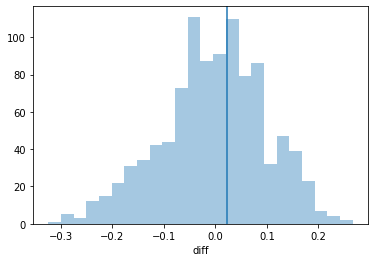

In [ ]:
sns.distplot(perm_results['diff'], kde=False, norm_hist=False)

plt.axvline(diferencia_en_proporcion);

Solamente de ver la histograma podemos concluir que nuestro resultado es de hecho bastante típico. Un gran número de modelos realizados totalmente al azar tuvieron valores iguales o más extremos que el que obtuvimos en nuestro experimento.

Vamos ahora a obtener el Valor P para cuantificar numéricamente nuestro resultado:

In [ ]:
(perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0]

0.429

p_value < alpha para aceptar la hipotesis 

Este valor quiere decir que el 42.9% de los test que hicimos obtuvieron un valor igual o más extremo que el obtenido en el experimento. Esto está extremadamente alejado de un Alfa de 5%, y por lo tanto definitivamente nuestro resultado **no es estadísticamente significativo**.

-----

## Reto 1: Pruebas A/B

### 1. Objetivos:
    - Practicar evaluar los resultados de una Prueba A/B
 
---
    
### 2. Desarrollo:

### a) Evaluando una prueba A/B de flujo de ventas

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un `1` en la columna `conversion` y un `0` en la columna `no conversion`.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

1. Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
2. Después aplica el test de permutación:
    1. Combina los resultados de ambos grupos en un mismo conjunto de datos
    2. Revuelve los datos
    3. Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    4. El resto de los datos conforman nuestro nuevo grupo B.
    5. Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    6. Repite los pasos 1-5 `R` veces para obtener una distribución de la estadística de interés.
3. Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
4. Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).
5. Comenta tus hallazgos con tus compañeros y la experta.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_ab = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto-Datasets/Remoto ab_test-sales_pipeline-2.csv')
df_ab.sample(6)

,test,conversion,no conversion
45613,B,0,1
53826,B,0,1
41002,A,0,1
29231,B,0,1
66623,B,1,0
72796,A,0,1


0.073


<ipython-input-5-23b6ce27bb13>:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perm_results['diff'], kde=False, norm_hist=False)


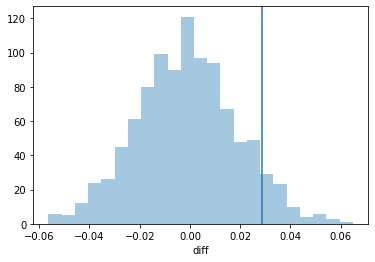

In [5]:
total_count = df_ab.groupby('test')[['conversion', 'no conversion']].sum()
total_count['success rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])

all_measurements = df_ab[['conversion', 'no conversion']]

value_counts = df_ab['test'].value_counts()

conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
    a = df_ab.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())
    
    b = df_ab.loc[~df_ab.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())


perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})


perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])


print((perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0])

sns.distplot(perm_results['diff'], kde=False, norm_hist=False)

plt.axvline(diferencia_en_proporcion);

-----

<ins>Procesamiento de Lenguaje Natural</ins>

El lenguaje natural pertenece al tipo de datos que llamamos datos no estructurados. Esto se debe a que su estructura es bastante más impredecible que la de nuestros datos estructurados. Aunque existen reglas gramaticales y de sintaxis, hay mucha variedad en el uso del lenguaje, además de que la variedad posible de combinaciones es inmensamente grande.

¿Esto significa que no hay manera de entender el lenguaje natural estadísticamente? Para nada. El procesamiento de lenguaje natural reúne una serie de técnicas que nos ayudan a entender conjuntos de datos que contienen texto libre y a construir modelos que puedan servirnos para traducir entre idiomas, reconocer palabras a partir de grabaciones de audio, predecir oraciones, analizar sentimientos en un texto y mucho más.

Vamos a explorar algunas herramientas y técnicas que hacen esto posible.

> 

[**`Ejemplo 2`**](Ejemplo-02/regex.ipynb)
[**`Reto 2`**](Reto-02/regex.ipynb)

[**`Ejemplo 3`**](Ejemplo-03/nltk_text.ipynb)
[**`Reto 3`**](Reto-03/nltk_text.ipynb)

[**`Ejemplo 4`**](Ejemplo-04/nltk_freq_dist.ipynb)
[**`Ejemplo 5`**](Ejemplo-05/nlp_visualizaciones.ipynb)
[**`Reto 4`**](Reto-04/nltk_freq_dist_y_visualizaciones.ipynb)

---


## Ejemplo 2: Regex

### 1. Objetivos:
    - Repasar algunas reglas básicas de las Expresiones Regulares y su aplicación usando pandas
 
---
    
### 2. Desarrollo:

Ya conoces seguramente las Expresiones Regulares. Las expresiones regulares o regex son secuencias de caracteres que definen un patrón de búsqueda. Son una manera de describirle a nuestros programas qué patrones estamos buscando en nuestros datos.

Las expresiones regulares resultan sumamente útiles para trabajar con lenguaje natural. Vamos a repasar algunas de las reglas de las regex y a aprender a aplicarlas usando pandas.

Para esto utilizaremos el dataset 'new_york_times_bestsellers-clean.json' que contiene datos acerca de libros que han sido seleccionados como bestsellers del New York Times.

In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto-Datasets/Remoto new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Hay varias entradas para los mismos libros, así que los he agrupado por título. En la columna 'description' tenemos descripciones de los libros en nuestro dataset. Resulta un conjunto de datos interesante, puesto que podemos entender qué tipo de libros son los que se convierten en bestsellers del New York Times.

### Patrones de Regex

Vamos a utilizar este dataset para repasar algunas maneras de definir patrones usando regex.

In [ ]:
# Buscar una palabra en un texto

grouped_by_title[grouped_by_title.str.contains('woman', case=False)]

title
1Q84                      In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS    A pregnant woman shows up in Cedar Cove on Chr...
A CHANGE IN ALTITUDE      A young woman’s life is transformed by a mount...
A TURN IN THE ROAD        A middle-age woman takes a cross-country road ...
AN OBJECT OF BEAUTY       A young, beautiful and ambitious woman ruthles...
                                                ...                        
THIS BODY OF DEATH        Detective Thomas Lynley becomes involved when ...
THOSE IN PERIL            A private security agent battles pirates who h...
WHAT DOESN'T KILL YOU     A Hong Kong woman who works for the C.I.A. sea...
WHERE WE BELONG           A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS    A woman makes discoveries about her sister and...
Name: description, Length: 74, dtype: object

In [ ]:
# Buscar la aparición de números del 0 al 9

grouped_by_title[grouped_by_title.str.contains('[0-9]')]

title
1Q84                          In 1980s Tokyo, a woman who punishes perpetrat...
2030                          In 2030, the young resent the elderly for drai...
A LESSON IN SECRETS           In the summer of 1932, Maisie Dobbs’s first as...
A MEMORY OF LIGHT             The 14th and final novel in the Wheel of Time ...
A MERCY                       In 17th-­century America, a slave mother urges...
                                                    ...                        
WAKING THE WITCH                 Book 11 of the Women of the Otherworld series.
WHERE WE BELONG               A woman’s successful life is disrupted by the ...
WHERE'D YOU GO, BERNADETTE    A renowned and reclusive Seattle architect dis...
WHITE WITCH, BLACK CURSE      A witch who is also a bounty hunter avenges he...
WORST CASE                    A New York detective raising 10 children alone...
Name: description, Length: 123, dtype: object

In [ ]:
# Uno o más números seguidos por una o más letras

grouped_by_title[grouped_by_title.str.contains('[0-9]+[a-z]+', case=False)]

title
1Q84                                        In 1980s Tokyo, a woman who punishes perpetrat...
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ANOTHER PIECE OF MY HEART                   A woman in her late 30s marries the man of her...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DARK STORM                                  In the 23r

In [ ]:
# Uno o más números seguidos por las letras 'th'

grouped_by_title[grouped_by_title.str.contains('[0-9]th', case=False)]

title
A MEMORY OF LIGHT                           The 14th and final novel in the Wheel of Time ...
A MERCY                                     In 17th-­century America, a slave mother urges...
A MIGHTY FORTRESS                           Book 4 of the Safehold series, which translate...
ANGEL TIME                                  \nA contract killer goes back to 13th-century ...
ARCTIC DRIFT                                In his 20th adventure, Dirk Pitt searches for ...
BONES ARE FOREVER                           The forensic anthropologist Temperance Brennan...
BREAKING POINT                              The 13th novel featuring Joe Pickett, a Wyomin...
DAMAGE CONTROL                              An elderly couple’s suicide-by-accident in the...
DAYS OF GOLD                                In the 18th century, Edilean and a Scottish la...
FLIRT                                       Anita Blake, vampire hunter, and the males in ...
ISLAND BENEATH THE SEA                      The story 

In [ ]:
# Textos que comiencen con la palabra 'After'

grouped_by_title[grouped_by_title.str.contains('^After', case=False)]

title
DON’T BLINK                        After a gruesome murder in a New York steak ho...
FATAL ERROR                        After the murder of a cyber-sociopath, Ali Rey...
FOUNDERS                           After society collapses, America’s fate is in ...
RAPTURE                            After a man stumbles in front of the reporter ...
STANDING IN ANOTHER MAN'S GRAVE    After retiring from the Edinburgh police force...
THE DOG STARS                      After a flu pandemic kills most of the populat...
THE MAGICIANS                      After sorcery college, a young man lives the h...
WINTER GARDEN                      After their father’s death, two sisters must c...
Name: description, dtype: object

In [ ]:
# Textos que terminen con la palabra 'London' y un punto (.)

grouped_by_title[grouped_by_title.str.contains('London.$', case=False)]

title
A DEVIL IS WAITING        Sean Dillon helps to foil a plot to assassinat...
A WALLFLOWER CHRISTMAS                     Matchmaking in Victorian London.
HER FEARFUL SYMMETRY      A woman haunts the flat she’s left to her twin...
Name: description, dtype: object

In [ ]:
# Textos que contengan la palabra 'cat' o 'dog'

grouped_by_title[grouped_by_title.str.contains('\scat\s|\sdog\s', case=False)]

title
A DOG’S JOURNEY    In a sequel to “A Dog’s Purpose,” Buddy the do...
DARK SUMMER        A veterinarian cares for an injured dog with a...
Name: description, dtype: object

In [ ]:
# Textos que contengan las palabras 'man' y/o 'woman' en singular y plural

grouped_by_title[grouped_by_title.str.contains('wom[ae]n|m[ae]n', case=False)]

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS      A pregnant woman shows up in Cedar Cove on Chr...
                                                  ...                        
WHERE WE BELONG             A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS      A woman makes discoveries about her sister and...
WICKED APPETITE             A dangerous man needs Elizabeth Tucker’s help ...
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
Name: description, Length: 197, dtype: object

In [ ]:
# Podemos también reemplazar todos los caracteres que no sean ni alfanuméricos ni espacios o tabs por espacios vacíos
# Esto nos va a ser muy útil más adelante

grouped_by_title.str.replace('[^\w\s]', '')

<ipython-input-65-efec3fe2e901>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title.str.replace('[^\w\s]', '')


title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Womens Murder ...
11TH HOUR                   Detective Lindsay Boxer and the Womens Murder ...
1225 CHRISTMAS TREE LANE    Puppies and an exhusband loom large in the las...
1356                        In the fourth book of the Grail Quest series t...
1Q84                        In 1980s Tokyo a woman who punishes perpetrato...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F Scot...
ZERO DAY                        A military investigator uncovers a conspiracy
ZERO HISTORY                Several characters from Spook Country return t...
ZONE ONE                        Fighting zombies in postapocalyptic Manhattan
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [ ]:
# Podemos también reemplazar todos los caracteres numéricos por espacios vacíos

grouped_by_title.str.replace('\d','')

<ipython-input-66-a07c58aa821b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title.str.replace('\d','')


title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In s Tokyo, a woman who punishes perpetrators ...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

-----


## Reto 2: Regex

### 1. Objetivos:
    - Practicar expresiones regulares con un conjunto de datos real
 
---
    
### 2. Desarrollo:

Vamos a practicar expresiones regulares utilizando un conjunto de datos llamado 'amazon_fine_food_reviews-clean.csv'. Este conjunto de datos es en realidad un subconjunto de un conjunto más grande que proviene de [esta fuente](https://www.kaggle.com/snap/amazon-fine-food-reviews). Contiene evaluaciones de muchos diversos productos realizadas por usuarios de Amazon. La columna 'text' contiene el texto de la evaluación, y ésa es la columna que nos interesa.

Vamos a practicar expresiones regulares con esa columna. Con cada búsqueda que realices vas a obtener un nuevo subconjunto de datos de un tamaño específico. Al terminar tus búsquedas compara el tamaño de tus subconjuntos de datos con los de tus compañeros, para checar que tus respuestas fueron correctas.

Tu Reto es entonces obtener subconjunto de datos que tengan estas características:

1. Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
2. Todas las evaluaciones que contengan algún número de dos digitos.
3. Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
4. Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
5. Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
6. Todas las evaluaciones que contengan las palabras 'horrible' **o** 'terrible'.
7. Todas las evaluaciones que contengan **solamente** letras minúsculas.

Después de realizar estas exploraciones, limpia tu conjunto de datos para remover lo siguiente de todos tus textos:

1. Cualquier forma parecida a la siguiente: `<br>` o `<br/>` (revisa variaciones de estos tags, con espacios intermedios, por ejemplo)
2. Signos en general
3. Digitos
4. Cualquier otra cosa que no te parezca relevante para nuestro análisis de lenguaje natural

También convierte todas las letras en minúsculas para homogeneizar nuestro conjunto de datos.

Guarda tu conjunto de datos como un archivo 'csv' para que lo puedas utilizar en los próximos retos (asegúrate de incluir **por lo menos** las columnas 'text' y 'score'.

In [18]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto-Datasets/Remoto amazon_fine_food_reviews-clean.csv')
df.sample(3)

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,summary,text
8652,23603,B001EO7GYY,AU26R57JX7GM8,"MoZirry ""Riverside""",1,1,5,1254096000,The perfect k-cup for those who are a fan of t...,-------------------Update 08/20/2012----------...
12666,96252,B004HOLD4W,A1SCANWWQTEG9I,TheLastCoyote,1,1,3,1316044800,only for lime lovers,I like lime and I like chili so I figured this...
11330,477610,B008MMTBCG,AMTDEF7SAP17N,Caelis,0,0,5,1338595200,A wonderful treat,"As a long-time buyer of Asian candies, I love ..."


In [19]:
# Agrupar
series_text = df.groupby("id")['text'].max()
series_text.sample(5)

id
391921    I don't even remember where or when I bought t...
16919     <a href="http://www.amazon.com/gp/product/B001...
332945    I love green teas and have tried many differen...
360322    THis is so good for you and It tastes good too...
484606    This is one of the best green teas. It has a g...
Name: text, dtype: object

In [20]:
# 1. Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
series_text[series_text.str.contains("food")]

id
86        We have three dogs and all of them love this f...
94        My golden retriever is one of the most picky d...
211       I started my cat on Felidae Platinum about 3 w...
214       As with canidae, Felidae has also changed thei...
238       The recommendation when we bought our puppies ...
                                ...                        
567926    Fish has that all important DHA that helps bra...
567928    This has been my baby's (now 21 months) favori...
568001    My 18+ month old enjoys this food very much. T...
568024    I have been making my son's baby food but need...
568062    Very surprised.  Expected it to be thicker.  M...
Name: text, Length: 1774, dtype: object

In [21]:
#2. Todas las evaluaciones que contengan algún número de dos digitos.
series_text[series_text.str.contains("[0-9][0-9]")]

id
94        My golden retriever is one of the most picky d...
238       The recommendation when we bought our puppies ...
369       "Nantucket Blend coffee is one of my favorites...
664       We have been using 17-Day Diet guided by Low-G...
673       I am very disappointed with this product becau...
                                ...                        
567928    This has been my baby's (now 21 months) favori...
568001    My 18+ month old enjoys this food very much. T...
568110    Absolutely delicious.  My dad bought these Pir...
568141    I have always bought Starbucks coffee from a s...
568215    I was very satisfied with my purchase of caram...
Name: text, Length: 3019, dtype: object

In [22]:
#3. Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
series_text[series_text.str.contains("\d{1,2}%")]

id
664       We have been using 17-Day Diet guided by Low-G...
1322      This cocoa powder has a deep, fruity taste- I ...
2154      These are awesome and if you know where to fin...
3596      Over 90% of dry dog food is very unhealthy and...
5610      A 25% price increase since the end of November...
                                ...                        
564046    I purchased this item after reading through th...
565533    Love the taste, first off!  I have only tried ...
566074    I love peanut butter but hate all the calories...
566387    There are basically two ways to look at Kraft ...
566427    We switched a long time ago to only eating 100...
Name: text, Length: 388, dtype: object

In [23]:
#4. Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
series_text[series_text.str.contains("\sdog\s", case = False)]

id
94        My golden retriever is one of the most picky d...
1277      Our dog loves these treats.  We sprinkle a few...
1577      No more heavy grocery bags for me -- I've just...
3596      Over 90% of dry dog food is very unhealthy and...
4649      I went searching for charcoal dog biscuits aft...
                                ...                        
564788    Our 12 year old dalmatian is acting like a dog...
565896    These items that you go through in a hurry are...
565912    My dog liked it but what doesn't he like. He c...
566347    I bought these not sure if they would make my ...
568230    These treats are excellent for training or jus...
Name: text, Length: 796, dtype: object

In [24]:
#5. Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
series_text[series_text.str.contains('awesome.$', case=False)]

id
101543    The toy seems pretty durable which is a big wi...
109285    If you want to improve your milk production, t...
152625    I love Tiger Sauce! I eat it with cream cheese...
230381    I've always loved Beetlejuice and it's no surp...
263973    I am a frequent purchaser on Amazon, yet I can...
265598    I had never heard of Dende Oil before I read a...
312084    these are awesome. though they're gluten free,...
327377    My boyfriend and I have been trying various bo...
431443    I have two extremely picky eaters. They truly ...
463485    After eating these you'll Never want another S...
466528    These are decent, but if you want a realllly g...
531750    This is a deliscious drink.I have trouble keep...
Name: text, dtype: object

In [25]:
#6. Todas las evaluaciones que contengan las palabras 'horrible' **o** 'terrible'.
series_text[series_text.str.contains("[horr|terr]ible", case = False)]

id
194       These little guys are tasty and refreshing.<br...
214       As with canidae, Felidae has also changed thei...
2737      This is  terrible popcorn! No taste, poor popp...
3957      I love the product.  But, the bottle design is...
9384      I thought this coffee was really horrible. Had...
                                ...                        
546846    Our 6-year old Vizsla has been eating Canidae ...
554686    I orders this fruitcake from amazon.I thought ...
559328    I have eaten the varieties of these for years ...
560651    Hubby and I found the fire-roasted Arriba! sal...
561327    I read all the other reviews...I'm in the camp...
Name: text, Length: 262, dtype: object

In [26]:
#7. Todas las evaluaciones que contengan **solamente** letras minúsculas.
series_text[series_text.str.islower()]

id
2805      bar harbor clam chowder is an excellent produc...
6485      tastes like dry brownie w/ invisible pieces of...
6500      they are fabulous and not bad for you, what el...
16434     best coffee from green mountain so far i recom...
19915     this is our 2nd. k-cup brewer and this one is ...
                                ...                        
563570    i love this cookie it was so soft and chewy an...
565492    start every morning w/click, 4oz ff milk and d...
566027    read about manuka honey online, and have bough...
566735    this is the best product i have ever used its ...
567754    i have tried many brands of the hot chocolates...
Name: text, Length: 205, dtype: object

In [28]:
# ELIMINAR
# 1. Cualquier forma parecida a la siguiente: `<br>` o `<br/>`
#    (revisa variaciones de estos tags, con espacios intermedios, por ejemplo)
# 2. Signos en general
# 3. Digitos
series_text_sin_br = series_text.replace(r'<br\s*/?>', ' ', regex=True)
series_text_sin_br

id
58        It is chocolate, what can I say.  Great variet...
61        Watch your prices with this.  While the assort...
73        I ordered two of these and two of raspberry la...
86        We have three dogs and all of them love this f...
94        My golden retriever is one of the most picky d...
                                ...                        
568303    These little nuggets are so good. I cry becaus...
568334    Wonderful alternative to the candies with all ...
568372    One of the very few, if not the only, mix that...
568400    These are straws filled with lemon flavored ho...
568448    Hoping there is no MSG in this, this tastes ex...
Name: text, Length: 14211, dtype: object

In [29]:
series_text_clean = series_text_sin_br.str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()
series_text_clean

id
58        it is chocolate what can i say  great variety ...
61        watch your prices with this  while the assortm...
73        i ordered two of these and two of raspberry la...
86        we have three dogs and all of them love this f...
94        my golden retriever is one of the most picky d...
                                ...                        
568303    these little nuggets are so good i cry because...
568334    wonderful alternative to the candies with all ...
568372    one of the very few if not the only mix that h...
568400    these are straws filled with lemon flavored ho...
568448    hoping there is no msg in this this tastes ext...
Name: text, Length: 14211, dtype: object

----

## Ejemplo 3: Nltk Text

### 1. Objetivos:
    - Aprender a usar el objeto Text de la librería Nltk
 
---
    
### 2. Desarrollo:

Vamos a utilizar la librería Nltk para explorar algunas técnicas básicas de procesamiento de lenguaje natural. Muchos de estos procedimientos normalmente sirven para preparar nuestros datos para entrenar un modelo o para realizar una visualización.

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto-Datasets/Remoto new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Primero hay que limpiar un poco nuestros textos:

In [ ]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

<ipython-input-75-7b19dfa1992e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-75-7b19dfa1992e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-75-7b19dfa1992e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Ahora, vamos a construir un objeto Text con nuestros datos. Primero que nada necesitamos descargar algunas librerías que requiere `nltk` para funcionar. Ve a tu terminal, abre python, importa nltk y usa el siguiente comando:

`nltk.download('punkt')`

Ahora sí, estamos listos:

In [ ]:
# Separamos cada oración en palabras

tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [ ]:
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [ ]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
# Creamos un objeto Text

all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: detective lindsay boxer and the womens murder club...>

In [ ]:
all_words

['detective',
 'lindsay',
 'boxer',
 'and',
 'the',
 'womens',
 'murder',
 'club',
 'race',
 'to',
 'find',
 'a',
 'missing',
 'baby',
 'detective',
 'lindsay',
 'boxer',
 'and',
 'the',
 'womens',
 'murder',
 'club',
 'investigate',
 'a',
 'possible',
 'serial',
 'killer',
 'puppies',
 'and',
 'an',
 'exhusband',
 'loom',
 'large',
 'in',
 'the',
 'last',
 'installment',
 'of',
 'the',
 'cedar',
 'cove',
 'series',
 'in',
 'the',
 'fourth',
 'book',
 'of',
 'the',
 'grail',
 'quest',
 'series',
 'the',
 'english',
 'and',
 'french',
 'face',
 'off',
 'at',
 'the',
 'battle',
 'of',
 'poitiers',
 'in',
 's',
 'tokyo',
 'a',
 'woman',
 'who',
 'punishes',
 'perpetrators',
 'of',
 'domestic',
 'violence',
 'has',
 'ties',
 'to',
 'an',
 'aspiring',
 'novelist',
 'with',
 'an',
 'unusual',
 'project',
 'in',
 'the',
 'young',
 'resent',
 'the',
 'elderly',
 'for',
 'draining',
 'the',
 'weakening',
 'economy',
 'and',
 'a',
 'devastating',
 'earthquake',
 'in',
 'los',
 'angeles',
 'tests

In [ ]:
text.concordance('woman', lines=20)

Displaying 20 of 60 matches:
 the battle of poitiers in s tokyo a woman who punishes perpetrators of domesti
of mishandling an autopsy a pregnant woman shows up in cedar cove on christmas 
e nothing is as it seems a middleage woman takes a crosscountry road trip with 
ment a young beautiful and ambitious woman ruthlessly ascends the heights of th
ring of humans and heavenly beings a woman in her late s marries the man of her
e ichidian universe a smuggler and a woman warrior must fight together to survi
paloosa trilogy two lawmen protect a woman one of them loves in frenchs fourth 
e an arcane society novel a southern woman is forever changed by the betrayals 
illipss earlier novels reappear as a woman persuades a friend to call off her w
plot to kill thousands of citizens a woman asks the boston detective dd warren 
arker in pursuing a dangerous case a woman joins with her estranged former step
texas fbi agent falls in love with a woman with a past lara callandine an exper
 wealthy co

In [ ]:
# similar te regresa las palabras que aparecen en contextos similares al argumento

text.similar('woman')

man widow killer series war case doctor yearold friend boy target
yacht murder nanny group secret witch massacre mystery family


In [ ]:
text.similar('women')

murder war love crimes killer battle resent administration eve life
recovery night state summer eyes wheel mother daughter author secrets


In [ ]:
text.concordance('man', lines=20)

Displaying 20 of 35 matches:
ngs a woman in her late s marries the man of her dreams and reaches out to his 
tar hides his male lover a former hit man for the mob who has become a doctor i
y the betrayals of her mother and the man she loves intrigue on the planet safe
a in two agents are tracking the same man a human trafficker who is now dealing
lorida for a missing girl and the con man who seduced her a runaway girl and th
s deployed to iraq a distraught young man discovers that he has grown horns a s
 empire of charis fights to survive a man who kidnapped a yearold girl contacts
and cia stand in his way when a young man finds a bag of diamonds he gets the a
stigator maisie dobbs helps an indian man whose sisters murder has been ignored
al attacks a woman her daughter and a man accused of murder evade the authoriti
ooper becomes involved when a wealthy man assaults a maid in a manhattan hotel 
d as christmas nears a terminally ill man is preparing his family for his death
n involved 

In [ ]:
text.similar('man')

killer woman widow murder war mystery case yearold vampire
disappearance target murderer yacht priest detective baby series
battle administration eve


In [ ]:
text.similar('men')

s french president west truth culprit males governor


In [ ]:
# common_contexts regresa los contextos que comparten dos o más palabras

text.common_contexts(['woman', 'man'])

a_in a_with a_who


In [ ]:
# Total de palabras

len(text)

12569

In [ ]:
# Total de palabras distintas

len(set(text))

3161

In [ ]:
# Cuantificando la riqueza léxica

len(set(text)) / len(text)

0.2514917654546901

In [ ]:
# Las colocaciones son pares de palabras (bigramas) que son inusualmente comunes en nuestro conjunto de datos

text.collocations()

new york; serial killer; stone barrington; los angeles; writing
pseudonymously; nora roberts; roberts writing; eve dallas; sookie
stackhouse; anita blake; dagger brotherhood; doc ford; jason bourne;
lacey sherlock; mitch rapp; temperance brennan; forensic sculptor;
alex cross; robert ludlums; san francisco


----

## Reto 3: Nltk Text

### 1. Objetivos:
    - Practicar el uso del objeto Text de la librería Nltk
 
---
    
### 2. Desarrollo:

Vamos a practicar utilizar el objeto Text de la librería Nltk. Para practicar utilizaremos el conjunto de datos que limpiaste en el Reto anterior. Este conjunto de datos debería de contener todas las evaluaciones registradas en el dataset 'amazon_fine_food_reviews-clean.csv' ya limpias y listas para el análisis.

Tu Reto consiste en lo siguiente:

1. Aplica el método 'word_tokenize' de nltk para separar todas las evaluaciones por palabras (esto puede tardar un ratito).
2. Genera una sola lista con todas las listas que obtuviste en el paso 1 y úsala para crear un objeto `nltk.Text` (esto también puede tardar un ratito, sé paciente).
3. Busca las concordancias de las palabras 'boy' y 'girl'.
4. Busca las palabras que tengan contextos similares a las palabras 'boy' y 'girl'.
5. Busca los contextos que tengan en común las palabras 'boy' y 'girl'.
6. Cuantifica la riqueza léxica de tu conjunto de datos
7. Sigue tu curiosidad y realiza algunas otras exploraciones por tu cuenta.
8. Comenta tus hallazgos con tus compañeros y la experta.

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
# Aplica el método 'word_tokenize' de nltk para separar todas las evaluaciones por palabras 
# (esto puede tardar un ratito). 
series_tokenized = series_text_clean.apply(nltk.word_tokenize)
series_tokenized

id
58        [it, is, chocolate, what, can, i, say, great, ...
61        [watch, your, prices, with, this, while, the, ...
73        [i, ordered, two, of, these, and, two, of, ras...
86        [we, have, three, dogs, and, all, of, them, lo...
94        [my, golden, retriever, is, one, of, the, most...
                                ...                        
568303    [these, little, nuggets, are, so, good, i, cry...
568334    [wonderful, alternative, to, the, candies, wit...
568372    [one, of, the, very, few, if, not, the, only, ...
568400    [these, are, straws, filled, with, lemon, flav...
568448    [hoping, there, is, no, msg, in, this, this, t...
Name: text, Length: 14211, dtype: object

In [33]:
# Genera una sola lista con todas las listas que obtuviste en 
# el paso 1 y úsala para crear un objeto nltk.Text (esto también puede tardar un ratito, sé paciente).
series_tokenized_all = series_tokenized.sum()
series_tokenized_all

['it',
 'is',
 'chocolate',
 'what',
 'can',
 'i',
 'say',
 'great',
 'variety',
 'of',
 'everything',
 'our',
 'family',
 'loves',
 'with',
 'a',
 'family',
 'of',
 'six',
 'it',
 'goes',
 'fast',
 'here',
 'perfect',
 'variety',
 'kit',
 'kat',
 'reeses',
 'take',
 'five',
 'and',
 'more',
 'watch',
 'your',
 'prices',
 'with',
 'this',
 'while',
 'the',
 'assortment',
 'was',
 'good',
 'and',
 'i',
 'did',
 'get',
 'this',
 'on',
 'a',
 'gold',
 'box',
 'purchase',
 'the',
 'price',
 'for',
 'this',
 'was',
 'less',
 'at',
 'target',
 'i',
 'ordered',
 'two',
 'of',
 'these',
 'and',
 'two',
 'of',
 'raspberry',
 'latice',
 'tarts',
 'directly',
 'from',
 'fantasicakes',
 'website',
 'for',
 'a',
 'dinner',
 'party',
 'i',
 'was',
 'hosting',
 'it',
 'arrived',
 'fresh',
 'and',
 'intact',
 'very',
 'good',
 'size',
 'i',
 'froze',
 'half',
 'for',
 'later',
 'use',
 'i',
 'am',
 'a',
 'pastry',
 'lover',
 'and',
 'these',
 'were',
 'the',
 'best',
 'ive',
 'ever',
 'tasted',
 'the'

In [34]:
nltk_text = nltk.Text(series_tokenized_all)
nltk_text

<Text: it is chocolate what can i say great...>

In [35]:
# Busca las concordancias de las palabras 'boy' y 'girl'.
nltk_text.concordance('boy', lines=20)

Displaying 20 of 79 matches:
more like box since it was a pack but boy was i wrong this is my very favorite 
l but i thought i would give it a try boy was i amazed by the refreshing flavor
both honey and peanuts going for them boy was i disappointed i thought this cer
ree and gluten eaters in our home and boy am i glad we ordered of these from am
ed down version of real coconut water boy was i wrong what i got was a very swe
 making of one down to the letter and boy oh boy not only was my husband thrill
 of one down to the letter and boy oh boy not only was my husband thrilled i no
up its calorie free and carb free and boy can you tell i tried this twice wante
e natural food chips are super greasy boy was i wrong this time madhouse munchi
ouse and arriving via the brown truck boy was i wrong they were just like the o
d wouldnt be destroyed within minutes boy did this fit the bill he has had it f
of almost six months ago for our baby boy and we still have one left after givi
ave ordered

In [36]:
nltk_text.concordance('girl', lines=20)

Displaying 20 of 71 matches:
ough it was a good value purchase my girl has loved these for two years when t
 this is one of the few treats wilhi girl enjoys the pods arrived fresh and qu
ate reminds me of the chocolate mint girl scout cookies with less sugar nd blu
fetti cake for a bridal shower for a girl whose colors were hot pink and black
n dogs as they age i want my special girl to stay healthy pain free and happy 
 bagmy tiny little italian greyhound girl gets a greenie at bedtime and someti
ike im usually doing for this little girl then go with the fancy feast version
ine from lindas diet delites my baby girl choked on this she had been eating f
hearing about this product on hungry girl i love peanut butter but not all tha
corn making sweet love to my tonguea girl unicorn of courseit is the cure for 
s food to be a lifesaver for her old girl i got them all none broken i wish th
tle something extra when shes a good girl and not have to worry if she will ge
ut the taste of the foo

In [37]:
# Busca las palabras que tengan contextos similares a las palabras 'boy' y 'girl'.
nltk_text.similar("boy")

i it and this that flavor there taste he one shipping she so dog but
price product what amazon which


In [38]:
nltk_text.similar("girl")

food dog cat tea taste one flavor coffee and time dogs door stuff
product mouth family price sugar store but


In [39]:
# Busca los contextos que tengan en común las palabras 'boy' y 'girl'.
nltk_text.common_contexts(['boy', 'girl'])

little_i


In [40]:
# Cuantifica la riqueza léxica de tu conjunto de datos
len(set(nltk_text)) / len(nltk_text)

0.02574476825973832

-----

## Ejemplo 4: Nltk FreqDist

### 1. Objetivos:
    - Aprender a usar el objeto FreqDist de la librería Nltk
 
---
    
### 2. Desarrollo:

Ahora vamos a explorar el objeto `FreqDist` que nos facilita el conteo de frecuencias de las palabras en nuestro conjunto de datos. La primera parte del procesamiento es idéntico a la vez pasada.

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto-Datasets/Remoto new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
grouped_by_title = df.groupby('title')['description'].max()

grouped_by_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

Primero hay que limpiar un poco nuestros textos:

In [ ]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

<ipython-input-97-7b19dfa1992e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-97-7b19dfa1992e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-97-7b19dfa1992e>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [ ]:
# Separamos cada oración en palabras

tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [ ]:
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [ ]:
all_words = tokenized.sum()

In [ ]:
# Utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 3161 samples and 12569 outcomes>


In [ ]:
freq_dist.most_common(50)

[('a', 917),
 ('the', 778),
 ('of', 417),
 ('in', 364),
 ('to', 283),
 ('and', 280),
 ('an', 149),
 ('her', 137),
 ('is', 127),
 ('his', 123),
 ('who', 107),
 ('for', 102),
 ('with', 93),
 ('on', 71),
 ('from', 70),
 ('by', 68),
 ('series', 61),
 ('new', 61),
 ('woman', 60),
 ('that', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('when', 46),
 ('as', 42),
 ('killer', 41),
 ('at', 40),
 ('must', 39),
 ('has', 38),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('she', 31),
 ('about', 30),
 ('their', 29),
 ('are', 28),
 ('war', 27),
 ('after', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('this', 24),
 ('agent', 24),
 ('into', 23),
 ('he', 23)]

Vamos a eliminar las 'palabras vacías' o 'stop words'

Para hacer esto tienes que correr primero el siguiente comando:

`nltk.download('stopwords')`

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist_no_stop_words.most_common(50)

[('series', 61),
 ('new', 61),
 ('woman', 60),
 ('book', 57),
 ('detective', 52),
 ('murder', 51),
 ('novel', 49),
 ('killer', 41),
 ('must', 39),
 ('investigates', 38),
 ('young', 35),
 ('man', 35),
 ('life', 32),
 ('former', 32),
 ('war', 27),
 ('family', 26),
 ('york', 26),
 ('two', 25),
 ('death', 25),
 ('world', 24),
 ('agent', 24),
 ('cia', 22),
 ('love', 22),
 ('secret', 21),
 ('discovers', 21),
 ('lawyer', 20),
 ('murdered', 20),
 ('finds', 20),
 ('eve', 19),
 ('th', 19),
 ('mother', 19),
 ('case', 19),
 ('women', 19),
 ('wife', 19),
 ('serial', 18),
 ('first', 18),
 ('secrets', 18),
 ('pursues', 18),
 ('investigator', 18),
 ('operative', 18),
 ('missing', 17),
 ('search', 17),
 ('searches', 17),
 ('help', 17),
 ('fbi', 17),
 ('stone', 17),
 ('years', 17),
 ('girl', 17),
 ('investigate', 16),
 ('one', 16)]

In [ ]:
# Conteo de una palabra y porcentaje de aparición

print(f'{(100 * freq_dist_no_stop_words["series"] / len(all_words_except_stop_words)):.3f}%')

0.799%


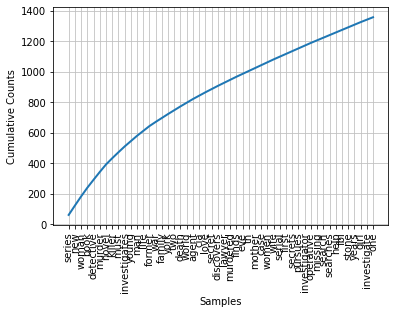

In [ ]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes

freq_dist_no_stop_words.plot(50, cumulative=True);

In [ ]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['puppies',
 'loom',
 'last',
 'grail',
 'poitiers',
 'tokyo',
 'punishes',
 'domestic',
 'aspiring',
 'resent',
 'draining',
 'weakening',
 'economy',
 'earthquake',
 'tests',
 'countrys',
 'jewish',
 'mishandling',
 'pregnant',
 'shows']

In [ ]:
# Palabras largas

unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0        dangerous
1       journalist
2            salem
3        middleage
4       protection
           ...    
3060       support
3061        remain
3062      betrayal
3063    underworld
3064    escalating
Length: 3065, dtype: object

In [ ]:
unique_series[unique_series.str.len() > 15]

31      turnofthethcentury
157       mountainclimbing
227       counterterrorism
885       singersongwriter
1290      dissatisfactions
1519      postthanksgiving
1897     suicidebyaccident
2021      publicityseeking
2496     multigenerational
2745      autobiographical
dtype: object

In [ ]:
# Palabras largas que son frecuentes

larger_than_10 = unique_series.str.len() > 7
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 7)

unique_series[larger_than_10 & is_frequent]

0            dangerous
103          character
206         barrington
216          operative
262           intrigue
385         mysterious
596           reporter
662           carolina
919         washington
972           daughter
1151     disappearance
1207      investigates
1329        characters
1541         detective
1643          assassin
1662         terrorist
1679         discovers
1774          involved
2081    pseudonymously
2456         daughters
2457     investigation
2516         manhattan
2532          forensic
2548       investigate
2672          searches
2715          together
2757          american
2784      investigator
2817        paranormal
3048          murdered
dtype: object

In [ ]:
# Podemos contar otras cosas, como la frecuencia de longitudes de nuestras palabras

freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

In [ ]:
freq_dist_lengths.most_common()

[(5, 1382),
 (6, 1364),
 (7, 1212),
 (4, 1051),
 (8, 707),
 (9, 586),
 (3, 471),
 (10, 354),
 (11, 164),
 (12, 157),
 (2, 60),
 (13, 60),
 (14, 30),
 (16, 11),
 (15, 11),
 (1, 8),
 (17, 2),
 (18, 1)]

In [ ]:
freq_dist_lengths.max()

5

In [ ]:
freq_dist_lengths[5]

1382

In [ ]:
# También podemos saber qué proporción del total de palabras tiene longitud de 5

freq_dist_lengths.freq(5)

0.18110339405058315

-----

## Ejemplo 5: NLP y Visualizaciones

### 1. Objetivos:
    - Aprender qué visualizaciones podemos realizar de nuestros procesamientos de lenguaje natural
 
---
    
### 2. Desarrollo:

Como ya bien sabes, las visualizaciones son una parte esencial de nuestros análisis. Vamos a aprender cómo realizar algunas visualizaciones de los análisis estadísticos que ya hemos realizado. Esto nos ayudará a presentar nuestros hallazgos de manera más efectiva.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto-Datasets/Remoto new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [ ]:
df['rank.numberInt'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14,  1, 11, 15, 16])

In [ ]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

----

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

x_1 = list(most_common_20[:, 0])
y_1 = pd.to_numeric(most_common_20[:, 1])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


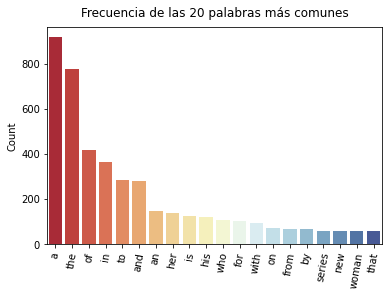

In [ ]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x_1, y_1, ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

x_2 = list(most_common_50[:, 0])
y_2 = pd.to_numeric(most_common_50[:, 1])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


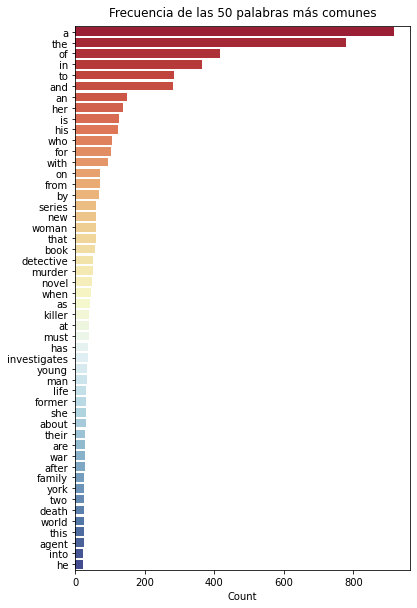

In [ ]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(y_2, x_2, ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [ ]:
# También podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('of', 'the'): 105, ('in', 'the'): 99, ('of', 'a'): 93, ('in', 'a'): 61, ('and', 'a'): 38, ('a', 'woman'): 34, ('book', 'of'): 33, ('for', 'the'): 32, ('to', 'the'): 31, ('and', 'the'): 30, ...})

<ipython-input-178-0cf8d1d26028>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


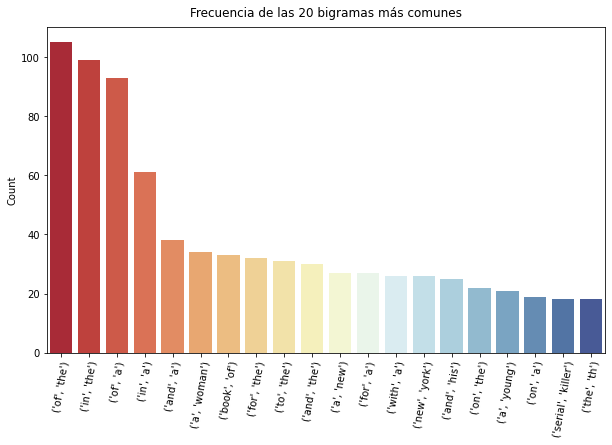

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('new', 'york'): 26, ('serial', 'killer'): 18, ('stone', 'barrington'): 12, ('los', 'angeles'): 10, ('eve', 'dallas'): 10, ('writing', 'pseudonymously'): 10, ('lt', 'eve'): 9, ('nora', 'roberts'): 9, ('roberts', 'writing'): 9, ('fbi', 'agent'): 8, ...})

<ipython-input-180-259e302b17cc>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


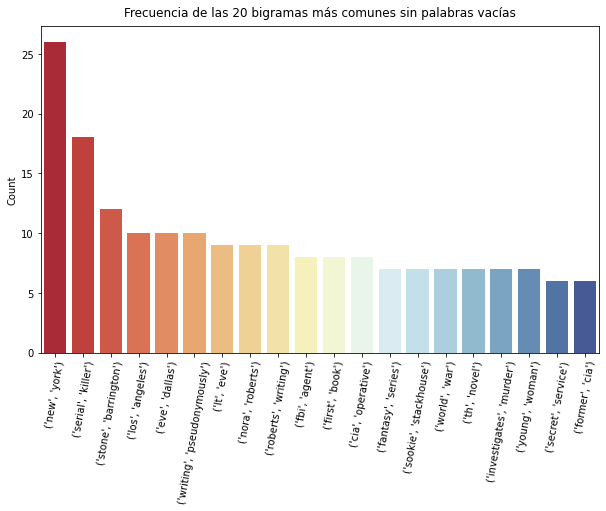

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

<ipython-input-182-3bb652ef8e68>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


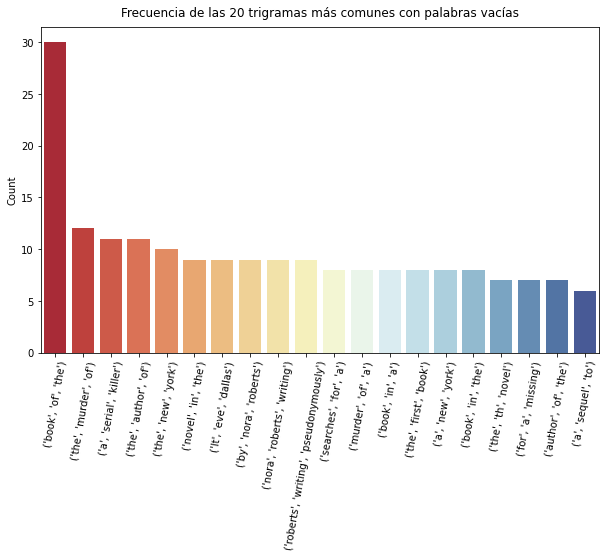

In [ ]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

<ipython-input-183-a67cb18e6d4b>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


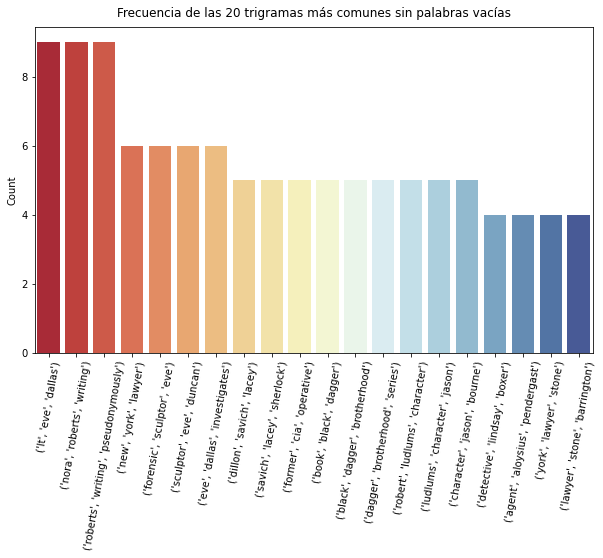

In [ ]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


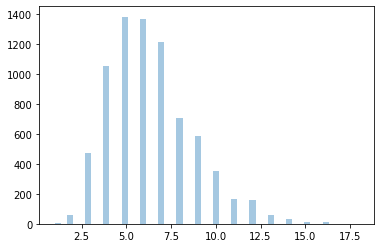

In [ ]:
sns.distplot(word_lengths, kde=False, norm_hist=False);

In [ ]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

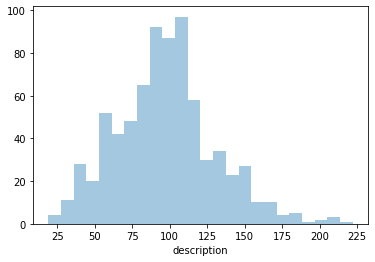

In [ ]:
sns.distplot(sentence_lengths, kde=False, norm_hist=False);

In [ ]:
num_of_words = grouped_by_title.str.split(' ').str.len()

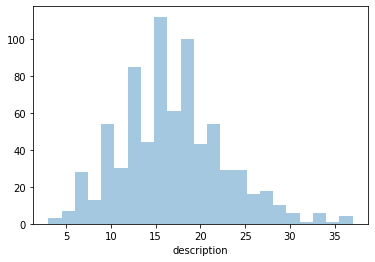

In [ ]:
sns.distplot(num_of_words, kde=False, norm_hist=False);

Para terminar, vamos a hacer una nube de palabras utilizando la librería `wordcloud`.

In [ ]:
from wordcloud import WordCloud

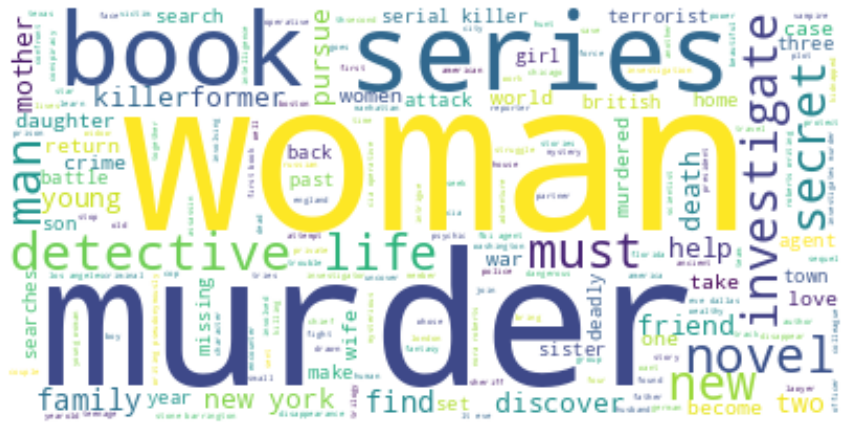

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

-----

## Reto 4: Nltk FreqDist y Visualizaciones de NLP

### 1. Objetivos:
    - Aprender a realizar análisis estadístico de datos no estructurados utilizando FreqDist
    - Utilizar seaborn para visualizar los análisis estadísticos que visualicemos
 
---
    
### 2. Desarrollo:

Vamos a utilizar el objeto `FreqDist` para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos Retos. Intercalaremos análisis puramente numérico con visualizaciones realizadas con `seaborn` y `matplotlib` para hacer más claros nuestros hallazgos.

Tu Reto consiste en lo siguiente:

1. Tokeniza las evaluaciones y crea una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utiliza el objeto `stopwords` encontrado en la librería `nltk.corpus` para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crea un objeto `Text` con tu dataset resultante.
4. Crea también un objeto `FreqDist` con el mismo dataset.
5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realiza un histograma del número de palabras contenidas en cada evaluación.
10. Genera una nube de palabras con tu dataset.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [55]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# 2. Utiliza el objeto stopwords encontrado en la librería nltk.corpus para 
#    filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
english_stop_words = stopwords.words('english')
english_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
series_tokenized_all_no_stopwords = [word for word in series_tokenized_all if word not in english_stop_words]
series_tokenized_all_no_stopwords

['chocolate',
 'say',
 'great',
 'variety',
 'everything',
 'family',
 'loves',
 'family',
 'six',
 'goes',
 'fast',
 'perfect',
 'variety',
 'kit',
 'kat',
 'reeses',
 'take',
 'five',
 'watch',
 'prices',
 'assortment',
 'good',
 'get',
 'gold',
 'box',
 'purchase',
 'price',
 'less',
 'target',
 'ordered',
 'two',
 'two',
 'raspberry',
 'latice',
 'tarts',
 'directly',
 'fantasicakes',
 'website',
 'dinner',
 'party',
 'hosting',
 'arrived',
 'fresh',
 'intact',
 'good',
 'size',
 'froze',
 'half',
 'later',
 'use',
 'pastry',
 'lover',
 'best',
 'ive',
 'ever',
 'tasted',
 'pastry',
 'soft',
 'jam',
 'really',
 'good',
 'taste',
 'great',
 'gone',
 'time',
 'guests',
 'really',
 'impressed',
 'three',
 'dogs',
 'love',
 'food',
 'bought',
 'specifically',
 'one',
 'dogs',
 'food',
 'allergies',
 'works',
 'great',
 'hot',
 'spots',
 'tummy',
 'problems',
 'love',
 'ships',
 'right',
 'door',
 'free',
 'shipping',
 'golden',
 'retriever',
 'one',
 'picky',
 'dogs',
 'ive',
 'ever',


In [58]:
# 3. Crea un objeto Text con tu dataset resultante.
nltk_text_no_stopwords = nltk.Text(series_tokenized_all_no_stopwords)
nltk_text_no_stopwords

<Text: chocolate say great variety everything family loves family...>

In [59]:
# 4. Crea también un objeto FreqDist con el mismo dataset.
freq_dist_no_stopwords = nltk.FreqDist(series_tokenized_all_no_stopwords)
freq_dist_no_stopwords

FreqDist({'like': 6255, 'good': 5092, 'taste': 4268, 'one': 4233, 'coffee': 4225, 'great': 4090, 'product': 3730, 'tea': 3604, 'flavor': 3567, 'love': 3214, ...})

In [60]:
# 5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de
#    barras 'verticales' para visualizar su frecuencia.
freq_dist_no_stopwords.most_common(20)

[('like', 6255),
 ('good', 5092),
 ('taste', 4268),
 ('one', 4233),
 ('coffee', 4225),
 ('great', 4090),
 ('product', 3730),
 ('tea', 3604),
 ('flavor', 3567),
 ('love', 3214),
 ('food', 3150),
 ('would', 3090),
 ('get', 2736),
 ('really', 2552),
 ('much', 2415),
 ('dont', 2376),
 ('also', 2142),
 ('little', 2131),
 ('time', 2089),
 ('use', 2046)]

In [61]:
# 6. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica 
#    de barras 'horizontales' para visualizar su frecuencia.
df_50mostcommon = pd.DataFrame(freq_dist_no_stopwords.most_common(20))
df_50mostcommon.columns = ["word","freq"]
df_50mostcommon.head(6)

,word,freq
0,like,6255
1,good,5092
2,taste,4268
3,one,4233
4,coffee,4225
5,great,4090


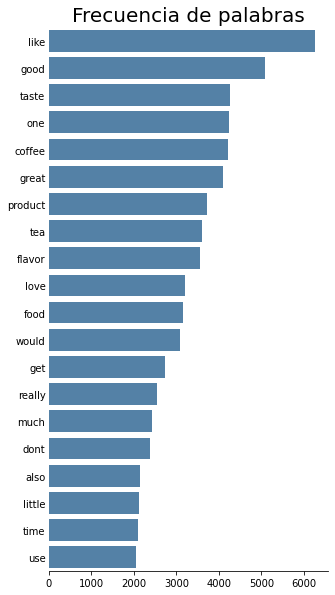

In [62]:
# Grafica de barras horizontales (Usando Matplotlib)
fig,ax = plt.subplots(figsize = (5,10))

sns.barplot(data = df_50mostcommon, x = "freq", y = "word", color = "steelblue", ax = ax)
ax.tick_params(axis="y", length = 0)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Frecuencia de palabras", size = 20)
sns.despine(left=True)

In [63]:
# Grafica de barras (Usando Altair)
alt.Chart(data = df_50mostcommon).mark_bar()\
.encode(
    y = alt.Y(shorthand="word:N", title=None, sort='-x'),
    x = alt.X(shorthand = "freq:Q", title=None),
    tooltip = [alt.Tooltip(title="Frecuencia", shorthand="freq")])\
.properties(title = "Frecuencia de palabras")\
.configure_axis(domain = False, ticks = False)\
.configure_axisY(labelFontWeight = 600)\
.configure_view(strokeWidth = 0)\
.configure_title(anchor = "start", fontSize = 20)

alt.Chart(...)

In [65]:
# 7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una 
#    gráfica de barras 'verticales' para visualizar tu frecuencia.
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(nltk_text_no_stopwords)))
df_20mostcommon_bigrams = pd.DataFrame(freq_dist_bigrams.most_common(20))
df_20mostcommon_bigrams.columns = ["bigram","freq"]
df_20mostcommon_bigrams["bigram"] = df_20mostcommon_bigrams["bigram"]\
                                    .apply(lambda x: ' '.join(map(str, x)))
df_20mostcommon_bigrams.sample(5)

,bigram,freq
8,gluten free,273
19,taste good,209
12,really good,251
11,dont know,256
17,subscribe save,216


In [66]:
# Grafica de barras (Usando Altair)
alt.Chart(data = df_20mostcommon_bigrams).mark_bar()\
.encode(
    y = alt.Y(shorthand="bigram:N", title=None, sort='-x'),
    x = alt.X(shorthand = "freq:Q", title=None),
    tooltip = [alt.Tooltip(title="Frecuencia", shorthand="freq")])\
.properties(title = "Frecuencia de bigramas")\
.configure_axis(domain = False, ticks = False)\
.configure_axisY(labelFontWeight = 600)\
.configure_view(strokeWidth = 0)\
.configure_title(anchor = "start", fontSize = 20)

alt.Chart(...)

In [67]:
# 8. Obtén una lista de las palabras que tengan 10 o más caracteres que 
#    aparezcan por lo menos 7 veces en el dataset.
# Palabras largas que son frecuentes

unique = set(series_tokenized_all_no_stopwords)
unique_series = pd.Series(list(unique))

larger_than_10 = unique_series.str.len() >= 10
is_frequent = unique_series.apply(lambda x: freq_dist_no_stopwords[x] >= 7)

unique_series[larger_than_10 & is_frequent]

6           frequently
21         refrigerate
33          miraculous
55          concoction
75          officially
             ...      
28471    disappointing
28592       flavouring
28595      temperature
28643      motherinlaw
28674       formulated
Length: 608, dtype: object

Text(0, 0.5, '')

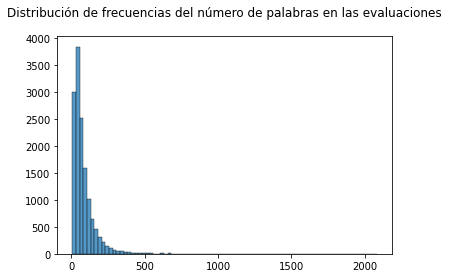

In [68]:
# 9. Realiza un histograma del número de palabras contenidas en cada evaluación.
series_text_clean_hist_n_words_sentences = series_text_clean.str.split(' ').str.len()

plt.title("Distribución de frecuencias del número de palabras en las evaluaciones",
          pad = 20)
sns.histplot(data = series_text_clean_hist_n_words_sentences, binwidth=25)
plt.xlabel(None)
plt.ylabel(None)

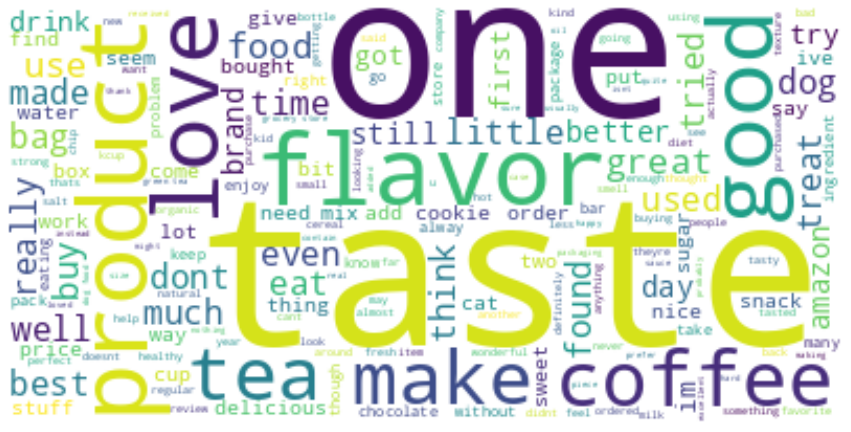

In [69]:
# 10. Genera una nube de palabras con tu dataset.
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(series_tokenized_all_no_stopwords))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

----
----
----

# **Retos** (otras formas de solución)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Reto 1

El archivo 'ab_test-sales_pipeline-2' tiene datos muy similares a los que vimos en el último ejemplo. Estamos evaluando dos flujos de ventas distintos: A y B. Cada vez que alguien compró el producto gracias a uno de los dos flujos, se registró como un 1 en la columna conversion y un 0 en la columna no conversion.

Evalúa la prueba A/B para saber si los resultados obtenidos son estadísticamente significativos. El Reto consiste en los siguientes pasos:

* Primero cuantifica cuál de los flujos de ventas fue más efectivo y en qué proporción.
* Después aplica el test de permutación:
    * Combina los resultados de ambos grupos en un mismo conjunto de datos
    * Revuelve los datos
    * Usando muestreo aleatorio sin reposición, construye un nuevo grupo A del mismo tamaño que el original.
    * El resto de los datos conforman nuestro nuevo grupo B.
    * Cuantifica la métrica o estadística que calculaste con los grupos originales y guarda el resultado.
    * Repite los pasos 1-5 R veces para obtener una distribución de la estadística de interés.
* Grafica tus resultados en un histograma y grafica una línea vertical que marque el resultado del experimento.
* Cuantifica el Valor P y evalúa la significación estadística con un Alfa de 0.05 (5%).

In [ ]:
df_ab = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/main/Datasets/ab_test-sales_pipeline-2.csv")
df_ab.sample(5)

,test,conversion,no conversion
23746,A,1,0
46025,B,0,1
22292,B,1,0
12673,A,1,0
60658,A,0,1


0.068


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


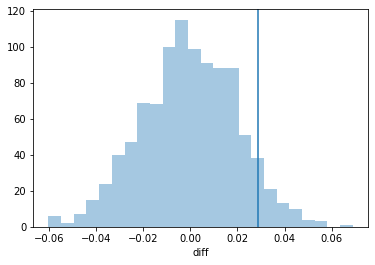

In [ ]:
total_count = df_ab.groupby('test')[['conversion', 'no conversion']].sum()
total_count['success rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])
diferencia_en_proporcion = 1 - (total_count.loc['B']['success rate'] / total_count.loc['A']['success rate'])

all_measurements = df_ab[['conversion', 'no conversion']]

value_counts = df_ab['test'].value_counts()

conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
    a = df_ab.sample(value_counts.loc['A'], replace=False)
    conv_a.append(a['conversion'].sum())
    no_conv_a.append(a['no conversion'].sum())
    
    b = df_ab.loc[~df_ab.index.isin(a.index)]
    conv_b.append(b['conversion'].sum())
    no_conv_b.append(b['no conversion'].sum())


perm_results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})


perm_results['a_conv_rate'] = perm_results['conv_a'] / (perm_results['conv_a'] + perm_results['no_conv_a'])
perm_results['b_conv_rate'] = perm_results['conv_b'] / (perm_results['conv_b'] + perm_results['no_conv_b'])

perm_results['diff'] = 1 - (perm_results['b_conv_rate'] / perm_results['a_conv_rate'])


print((perm_results['diff'] >= diferencia_en_proporcion).sum() / perm_results.shape[0])

sns.distplot(perm_results['diff'], kde=False, norm_hist=False)

plt.axvline(diferencia_en_proporcion);

# Reto 2: Regex

Vamos a practicar expresiones regulares utilizando un conjunto de datos llamado 'amazon_fine_food_reviews-clean.csv'. Este conjunto de datos es en realidad un subconjunto de un conjunto más grande que proviene de [esta fuente](https://www.kaggle.com/snap/amazon-fine-food-reviews). Contiene evaluaciones de muchos diversos productos realizadas por usuarios de Amazon. La columna 'text' contiene el texto de la evaluación, y ésa es la columna que nos interesa.

Vamos a practicar expresiones regulares con esa columna. Con cada búsqueda que realices vas a obtener un nuevo subconjunto de datos de un tamaño específico. Al terminar tus búsquedas compara el tamaño de tus subconjuntos de datos con los de tus compañeros, para checar que tus respuestas fueron correctas.

Tu Reto es entonces obtener subconjunto de datos que tengan estas características:

1. Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
2. Todas las evaluaciones que contengan algún número de dos digitos.
3. Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
4. Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
5. Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
6. Todas las evaluaciones que contengan las palabras 'horrible' **o** 'terrible'.
7. Todas las evaluaciones que contengan **solamente** letras minúsculas.

Después de realizar estas exploraciones, limpia tu conjunto de datos para remover lo siguiente de todos tus textos:

1. Cualquier forma parecida a la siguiente: `<br>` o `<br/>` (revisa variaciones de estos tags, con espacios intermedios, por ejemplo)
2. Signos en general
3. Digitos
4. Cualquier otra cosa que no te parezca relevante para nuestro análisis de lenguaje natural

También convierte todas las letras en minúsculas para homogeneizar nuestro conjunto de datos.

Guarda tu conjunto de datos como un archivo 'csv' para que lo puedas utilizar en los próximos retos (asegúrate de incluir **por lo menos** las columnas 'text' y 'score'.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/main/Datasets/amazon_fine_food_reviews-clean.csv")

# Agrupar
series_text = df.groupby("id")['text'].max()

In [ ]:
# 1. Todas las evaluaciones que contengan la palabra 'food' (en minúsculas).
series_text[series_text.str.contains("food")]

id
86        We have three dogs and all of them love this f...
94        My golden retriever is one of the most picky d...
211       I started my cat on Felidae Platinum about 3 w...
214       As with canidae, Felidae has also changed thei...
238       The recommendation when we bought our puppies ...
                                ...                        
567926    Fish has that all important DHA that helps bra...
567928    This has been my baby's (now 21 months) favori...
568001    My 18+ month old enjoys this food very much. T...
568024    I have been making my son's baby food but need...
568062    Very surprised.  Expected it to be thicker.  M...
Name: text, Length: 1774, dtype: object

In [ ]:
#2. Todas las evaluaciones que contengan algún número de dos digitos.
series_text[series_text.str.contains("[0-9][0-9]")]

id
94        My golden retriever is one of the most picky d...
238       The recommendation when we bought our puppies ...
369       "Nantucket Blend coffee is one of my favorites...
664       We have been using 17-Day Diet guided by Low-G...
673       I am very disappointed with this product becau...
                                ...                        
567928    This has been my baby's (now 21 months) favori...
568001    My 18+ month old enjoys this food very much. T...
568110    Absolutely delicious.  My dad bought these Pir...
568141    I have always bought Starbucks coffee from a s...
568215    I was very satisfied with my purchase of caram...
Name: text, Length: 3019, dtype: object

In [ ]:
#3. Todas las evaluaciones que contengan algún porcentaje (uno o más digitos seguidos de un signo de porcentaje).
series_text[series_text.str.contains("\d{1,2}%")]

id
664       We have been using 17-Day Diet guided by Low-G...
1322      This cocoa powder has a deep, fruity taste- I ...
2154      These are awesome and if you know where to fin...
3596      Over 90% of dry dog food is very unhealthy and...
5610      A 25% price increase since the end of November...
                                ...                        
564046    I purchased this item after reading through th...
565533    Love the taste, first off!  I have only tried ...
566074    I love peanut butter but hate all the calories...
566387    There are basically two ways to look at Kraft ...
566427    We switched a long time ago to only eating 100...
Name: text, Length: 388, dtype: object

In [ ]:
#4. Todas las evaluaciones que comiencen con la palabra 'Dog' o 'dog'.
series_text[series_text.str.contains("\sdog\s", case = False)]

id
94        My golden retriever is one of the most picky d...
1277      Our dog loves these treats.  We sprinkle a few...
1577      No more heavy grocery bags for me -- I've just...
3596      Over 90% of dry dog food is very unhealthy and...
4649      I went searching for charcoal dog biscuits aft...
                                ...                        
564788    Our 12 year old dalmatian is acting like a dog...
565896    These items that you go through in a hurry are...
565912    My dog liked it but what doesn't he like. He c...
566347    I bought these not sure if they would make my ...
568230    These treats are excellent for training or jus...
Name: text, Length: 796, dtype: object

In [ ]:
#5. Todas las evaluaciones que terminen con el fragmento 'awesome.' (fíjate que hay específicamente un punto después de la palabra 'awesome').
series_text[series_text.str.contains('awesome.$', case=False)]

id
101543    The toy seems pretty durable which is a big wi...
109285    If you want to improve your milk production, t...
152625    I love Tiger Sauce! I eat it with cream cheese...
230381    I've always loved Beetlejuice and it's no surp...
263973    I am a frequent purchaser on Amazon, yet I can...
265598    I had never heard of Dende Oil before I read a...
312084    these are awesome. though they're gluten free,...
327377    My boyfriend and I have been trying various bo...
431443    I have two extremely picky eaters. They truly ...
463485    After eating these you'll Never want another S...
466528    These are decent, but if you want a realllly g...
531750    This is a deliscious drink.I have trouble keep...
Name: text, dtype: object

In [ ]:
#6. Todas las evaluaciones que contengan las palabras 'horrible' **o** 'terrible'.
series_text[series_text.str.contains("[horr|terr]ible", case = False)]

id
194       These little guys are tasty and refreshing.<br...
214       As with canidae, Felidae has also changed thei...
2737      This is  terrible popcorn! No taste, poor popp...
3957      I love the product.  But, the bottle design is...
9384      I thought this coffee was really horrible. Had...
                                ...                        
546846    Our 6-year old Vizsla has been eating Canidae ...
554686    I orders this fruitcake from amazon.I thought ...
559328    I have eaten the varieties of these for years ...
560651    Hubby and I found the fire-roasted Arriba! sal...
561327    I read all the other reviews...I'm in the camp...
Name: text, Length: 262, dtype: object

In [ ]:
#7. Todas las evaluaciones que contengan **solamente** letras minúsculas.
series_text[series_text.str.islower()]

id
2805      bar harbor clam chowder is an excellent produc...
6485      tastes like dry brownie w/ invisible pieces of...
6500      they are fabulous and not bad for you, what el...
16434     best coffee from green mountain so far i recom...
19915     this is our 2nd. k-cup brewer and this one is ...
                                ...                        
563570    i love this cookie it was so soft and chewy an...
565492    start every morning w/click, 4oz ff milk and d...
566027    read about manuka honey online, and have bough...
566735    this is the best product i have ever used its ...
567754    i have tried many brands of the hot chocolates...
Name: text, Length: 205, dtype: object

In [ ]:
# ELIMINAR
# 1. Cualquier forma parecida a la siguiente: `<br>` o `<br/>`
#    (revisa variaciones de estos tags, con espacios intermedios, por ejemplo)
# 2. Signos en general
# 3. Digitos
series_text_sin_br = series_text.replace(r'<br\s*/?>', ' ', regex=True)
series_text_clean = series_text_sin_br.str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

# Reto 3

* Aplica el método 'word_tokenize' de nltk para separar todas las evaluaciones por palabras (esto puede tardar un ratito).
* Genera una sola lista con todas las listas que obtuviste en el paso 1 y úsala para crear un objeto nltk.Text (esto también puede tardar un ratito, sé paciente).
* Busca las concordancias de las palabras 'boy' y 'girl'.
* Busca las palabras que tengan contextos similares a las palabras 'boy' y 'girl'.
* Busca los contextos que tengan en común las palabras 'boy' y 'girl'.
* Cuantifica la riqueza léxica de tu conjunto de datos


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Aplica el método 'word_tokenize' de nltk para separar todas las evaluaciones por palabras 
# (esto puede tardar un ratito). 
series_tokenized = series_text_clean.apply(nltk.word_tokenize)

In [ ]:
# Genera una sola lista con todas las listas que obtuviste en 
# el paso 1 y úsala para crear un objeto nltk.Text (esto también puede tardar un ratito, sé paciente).
series_tokenized_all = series_tokenized.sum()

nltk_text = nltk.Text(series_tokenized_all)

In [ ]:
# Busca las concordancias de las palabras 'boy' y 'girl'.
nltk_text.concordance('boy', lines=20)

Displaying 20 of 79 matches:
more like box since it was a pack but boy was i wrong this is my very favorite 
l but i thought i would give it a try boy was i amazed by the refreshing flavor
both honey and peanuts going for them boy was i disappointed i thought this cer
ree and gluten eaters in our home and boy am i glad we ordered of these from am
ed down version of real coconut water boy was i wrong what i got was a very swe
 making of one down to the letter and boy oh boy not only was my husband thrill
 of one down to the letter and boy oh boy not only was my husband thrilled i no
up its calorie free and carb free and boy can you tell i tried this twice wante
e natural food chips are super greasy boy was i wrong this time madhouse munchi
ouse and arriving via the brown truck boy was i wrong they were just like the o
d wouldnt be destroyed within minutes boy did this fit the bill he has had it f
of almost six months ago for our baby boy and we still have one left after givi
ave ordered

In [ ]:
nltk_text.concordance('girl', lines=20)

Displaying 20 of 71 matches:
ough it was a good value purchase my girl has loved these for two years when t
 this is one of the few treats wilhi girl enjoys the pods arrived fresh and qu
ate reminds me of the chocolate mint girl scout cookies with less sugar nd blu
fetti cake for a bridal shower for a girl whose colors were hot pink and black
n dogs as they age i want my special girl to stay healthy pain free and happy 
 bagmy tiny little italian greyhound girl gets a greenie at bedtime and someti
ike im usually doing for this little girl then go with the fancy feast version
ine from lindas diet delites my baby girl choked on this she had been eating f
hearing about this product on hungry girl i love peanut butter but not all tha
corn making sweet love to my tonguea girl unicorn of courseit is the cure for 
s food to be a lifesaver for her old girl i got them all none broken i wish th
tle something extra when shes a good girl and not have to worry if she will ge
ut the taste of the foo

In [ ]:
# Busca las palabras que tengan contextos similares a las palabras 'boy' y 'girl'.
nltk_text.similar("boy")

i it and this that flavor there taste he one shipping she so dog but
price product what amazon which


In [ ]:
nltk_text.similar("girl")

food dog cat tea taste one flavor coffee and time dogs door stuff
product mouth family price sugar store but


In [ ]:
# Busca los contextos que tengan en común las palabras 'boy' y 'girl'.
nltk_text.common_contexts(['boy', 'girl'])

little_i


In [ ]:
# Cuantifica la riqueza léxica de tu conjunto de datos
len(set(nltk_text)) / len(nltk_text)

0.02574476825973832

# Reto 4


Vamos a utilizar el objeto FreqDist para hacer análisis estadístico de las mismas evaluaciones que has utilizado en los últimos Retos. Intercalaremos análisis puramente numérico con visualizaciones realizadas con seaborn y matplotlib para hacer más claros nuestros hallazgos.

Tu Reto consiste en lo siguiente:

1. Tokeniza las evaluaciones y crea una sola lista que contenga todas las palabras en nuestro conjunto de datos.
2. Utiliza el objeto stopwords encontrado en la librería nltk.corpus para filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
3. Crea un objeto Text con tu dataset resultante.
4. Crea también un objeto FreqDist con el mismo dataset.
5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de barras 'verticales' para visualizar su frecuencia.
6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica de barras 'horizontales' para visualizar su frecuencia.
7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una gráfica de barras 'verticales' para visualizar tu frecuencia.
8. Obtén una lista de las palabras que tengan 10 o más caracteres que aparezcan por lo menos 7 veces en el dataset.
9. Realiza un histograma del número de palabras contenidas en cada evaluación.
10. Genera una nube de palabras con tu dataset.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 2. Utiliza el objeto stopwords encontrado en la librería nltk.corpus para 
#    filtrar todas las palabras vacías de tu conjunto de datos y solamente tener palabras relevantes.
english_stop_words = stopwords.words('english')

series_tokenized_all_no_stopwords = [word for word in series_tokenized_all if word not in english_stop_words]

In [ ]:
# 3. Crea un objeto Text con tu dataset resultante.
nltk_text_no_stopwords = nltk.Text(series_tokenized_all_no_stopwords)

In [ ]:
# 4. Crea también un objeto FreqDist con el mismo dataset.
freq_dist_no_stopwords = nltk.FreqDist(series_tokenized_all_no_stopwords)

In [ ]:
# 5. Obtén las 20 palabras más comunes en el dataset y realiza una gráfica de
#    barras 'verticales' para visualizar su frecuencia.
freq_dist_no_stopwords.most_common(20)

[('like', 6255),
 ('good', 5092),
 ('taste', 4268),
 ('one', 4233),
 ('coffee', 4225),
 ('great', 4090),
 ('product', 3730),
 ('tea', 3604),
 ('flavor', 3567),
 ('love', 3214),
 ('food', 3150),
 ('would', 3090),
 ('get', 2736),
 ('really', 2552),
 ('much', 2415),
 ('dont', 2376),
 ('also', 2142),
 ('little', 2131),
 ('time', 2089),
 ('use', 2046)]

In [ ]:
# 6. Obtén las 50 palabras más comunes en el dataset y realiza una gráfica 
#    de barras 'horizontales' para visualizar su frecuencia.
df_50mostcommon = pd.DataFrame(freq_dist_no_stopwords.most_common(20))
df_50mostcommon.columns = ["word","freq"]
df_50mostcommon.head(2)

,word,freq
0,like,6255
1,good,5092


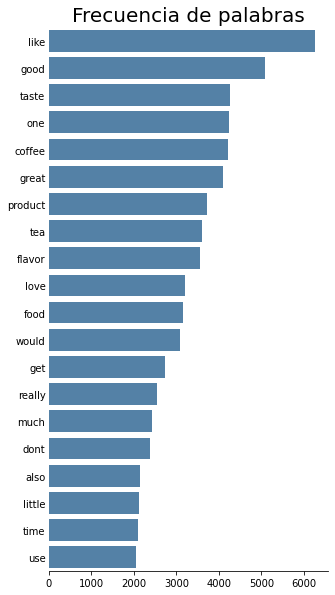

In [ ]:
# Grafica de barras horizontales (Usando Matplotlib)
fig,ax = plt.subplots(figsize = (5,10))

sns.barplot(data = df_50mostcommon, x = "freq", y = "word", color = "steelblue", ax = ax)
ax.tick_params(axis="y", length = 0)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Frecuencia de palabras", size = 20)
sns.despine(left=True)

In [ ]:
# Grafica de barras (Usando Altair)
alt.Chart(data = df_50mostcommon).mark_bar()\
.encode(
    y = alt.Y(shorthand="word:N", title=None, sort='-x'),
    x = alt.X(shorthand = "freq:Q", title=None),
    tooltip = [alt.Tooltip(title="Frecuencia", shorthand="freq")])\
.properties(title = "Frecuencia de palabras")\
.configure_axis(domain = False, ticks = False)\
.configure_axisY(labelFontWeight = 600)\
.configure_view(strokeWidth = 0)\
.configure_title(anchor = "start", fontSize = 20)

alt.Chart(...)

In [ ]:
# 7. Obtén los 20 bigramas más frecuentes en el dataset y realiza una 
#    gráfica de barras 'verticales' para visualizar tu frecuencia.
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(nltk_text_no_stopwords)))
df_20mostcommon_bigrams = pd.DataFrame(freq_dist_bigrams.most_common(20))
df_20mostcommon_bigrams.columns = ["bigram","freq"]
df_20mostcommon_bigrams["bigram"] = df_20mostcommon_bigrams["bigram"]\
                                    .apply(lambda x: ' '.join(map(str, x)))
df_20mostcommon_bigrams.sample(2)

,bigram,freq
1,peanut butter,361
17,subscribe save,216


In [ ]:
# Grafica de barras (Usando Altair)
alt.Chart(data = df_20mostcommon_bigrams).mark_bar()\
.encode(
    y = alt.Y(shorthand="bigram:N", title=None, sort='-x'),
    x = alt.X(shorthand = "freq:Q", title=None),
    tooltip = [alt.Tooltip(title="Frecuencia", shorthand="freq")])\
.properties(title = "Frecuencia de bigramas")\
.configure_axis(domain = False, ticks = False)\
.configure_axisY(labelFontWeight = 600)\
.configure_view(strokeWidth = 0)\
.configure_title(anchor = "start", fontSize = 20)

alt.Chart(...)

In [ ]:
# 8. Obtén una lista de las palabras que tengan 10 o más caracteres que 
#    aparezcan por lo menos 7 veces en el dataset.
# Palabras largas que son frecuentes

unique = set(series_tokenized_all_no_stopwords)
unique_series = pd.Series(list(unique))

larger_than_10 = unique_series.str.len() >= 10
is_frequent = unique_series.apply(lambda x: freq_dist_no_stopwords[x] >= 7)

unique_series[larger_than_10 & is_frequent]

106         grandchildren
119          supermarkets
191          anticipation
238           accordingly
326           temptations
               ...       
28312         disappeared
28544         overbearing
28546         incorporate
28708    gastrointestinal
28793         instruction
Length: 313, dtype: object

Text(0, 0.5, '')

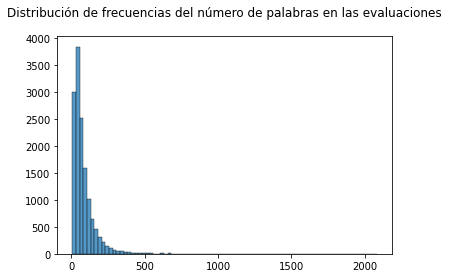

In [ ]:
# 9. Realiza un histograma del número de palabras contenidas en cada evaluación.
series_text_clean_hist_n_words_sentences = series_text_clean.str.split(' ').str.len()

plt.title("Distribución de frecuencias del número de palabras en las evaluaciones",
          pad = 20)
sns.histplot(data = series_text_clean_hist_n_words_sentences, binwidth=25)
plt.xlabel(None)
plt.ylabel(None)

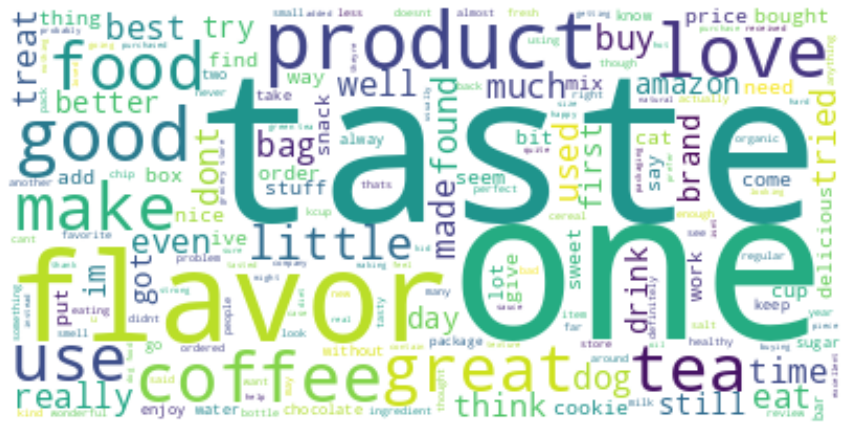

In [ ]:
# 10. Genera una nube de palabras con tu dataset.
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(series_tokenized_all_no_stopwords))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

----
----
----

## **Postwork**

 ## Nombre del Postwork: Procesamiento de Lenguaje Natural

### OBJETIVO 

- Aplicar los conceptos de Procesamiento de Lenguaje Natural aprendidos en esta sesión a nuestro proyecto

#### REQUISITOS 

- Tener un dataset limpio que contenga una columna con datos no estructurados.

> En caso de que tu dataset no contenga datos no estructurados, date una vuelta por [Kaggle](https://kaggle.com) y busca algún dataset apropiado. Lo que nos interesa en que practiques estas herramientas durante la clase para que puedas expresarle tus dudas a la experta.

#### DESARROLLO

En esta sesión aprendimos dos cosas: Pruebas A/B y Procesamiento de Lenguaje Natural. No podemos practicar Pruebas A/B en nuestro proyecto, porque en realidad los proyectos que estamos realizando no se prestan a esto. No pasa nada, ¡ya tendrás oportunidad de practicar eso en tu primer trabajo como científico de datos!

Por lo pronto en este Postwork vamos a practicar las técnicas de Procesamiento de Lenguaje Natural que hemos aprendido. Si tu dataset no contiene datos no estructurados, busca un dataset apropiado y realiza los siguientes ejercicios. Si tu dataset contiene datos no estructurados, entonces éste es el momento de agregar PLN a tu proyecto.

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

1. Utiliza patrones Regex para limpiar tus datos estructurados
2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método `similar` para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

¡Mucha suerte!